# Mushroom Edibility
## CP640
### Taylor Dredge

# Data Setup
To automatically pull the mushroom dataset from the repository, UC Irving Machine Learning Repository where this dataset came from, has a handy library to pull this dataset from it's servers.
The following command installs the package via pip

In [782]:
#install repo library
!pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Notebook Setup

In [783]:
# Import initial 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Dataset
### Fetch dataset from the repository
http://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

In [784]:
import os

# fetch dataset is conditional if a local copy is not made yet
file_name = 'mushroom2.csv'
file_exists = False

if os.path.exists(file_name):
    print("File exists\nContinue")
    file_exists = True
else:
    print("Data file does not exist\n Fetching from remote repository...")

    # the id is found on the webpage where the dataset is located
    df = fetch_ucirepo(id=848)

    # data (as pandas dataframes)
    X = df.data.features
    y = df.data.targets

    # metadata
    print(df.metadata)

    # variable information
    print(df.variables)

    print("Data fetch complete")



File exists
Continue


### Combine features and targets into single dataframe & save to local csv file
To avoid re-downloading the dataset everytime this model

In [785]:

if not file_exists:
    # Combine features and class labels (targets) into one dataframe for saving a local copy 
    df_combined = X.copy()
    df_combined["class"] = y
    df_combined.to_csv("mushroom2.csv")


### Read in the mushroom dataset

In [786]:
df =pd.read_csv("mushroom2.csv", index_col=0)
df.head(5)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p


# Data Preprocessing & Exploration 

## Missing Values
The missing values need to be handled and this section aims to leave the dataset with properly filling values for any unknown.

### Value Counts
Show the amount of instances of each value in each categorical feature 

In [787]:
# Show the various values in the categorical feature
for col in df.columns:
    if df[col].dtype == np.dtype('object'):
        print(df[col].value_counts())
        print()

cap-shape
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: count, dtype: int64

cap-surface
t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: count, dtype: int64

cap-color
n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: count, dtype: int64

does-bruise-or-bleed
f    50479
t    10590
Name: count, dtype: int64

gill-attachment
a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: count, dtype: int64

gill-spacing
c    24710
d     7766
f     3530
Name: count, dtype: int64

gill-color
w    18521
n     9645
y     9546
p     5983
g     4118
f     3530
o     2909
k     2375
r     1399
e     1066
u     1023
b      954
Name: count, dtype: int64

stem-root
s    3177
b    3177
r    1412
f    1059
c     706
Name: count, dtype: int64

stem-surface
s    6025
y    4940
i    4396
t    

### Get Missing Values Counts

In [788]:
# Check for any missing values
def get_missing_counts(df: pd.DataFrame):
    """
    Prints the number of missing values for each feature.

    Parameters:
        df (pandas dataframe object): pandas dataframe object
                                 pd.Dataframe.
    """
    for i in df.columns:
        # count number of rows with missing values

        # get the count of missing values for the i column. isnull() set all NaN values to be True and others are False.
        # and sum() counts the number of True values in this column
        n_miss = df[i].isnull().sum()

        # df.shape[0] is the count of all values in a column, including NaN values.
        # So we can get missing percentage of each column via the code below
        print(f'> {i}, Missing: {n_miss}')

# Run the function and print the missing rate of each column
get_missing_counts(df)

> cap-diameter, Missing: 0
> cap-shape, Missing: 0
> cap-surface, Missing: 14120
> cap-color, Missing: 0
> does-bruise-or-bleed, Missing: 0
> gill-attachment, Missing: 9884
> gill-spacing, Missing: 25063
> gill-color, Missing: 0
> stem-height, Missing: 0
> stem-width, Missing: 0
> stem-root, Missing: 51538
> stem-surface, Missing: 38124
> stem-color, Missing: 0
> veil-type, Missing: 57892
> veil-color, Missing: 53656
> has-ring, Missing: 0
> ring-type, Missing: 2471
> spore-print-color, Missing: 54715
> habitat, Missing: 0
> season, Missing: 0
> class, Missing: 0


In [789]:
#get columns with missing values
missing_cols = []
for col in df.columns:    
    if df[col].isna().sum()>0:
        missing_cols.append(col)
print(missing_cols)

['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color']


### Plot Missing Values
Plot the percent of missing values in pie charts for each feature which contains missing values

In [790]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot grid with 3 rows and 3 columns
# We know from above there are 9 features with missing values
fig = make_subplots(rows=3, cols=3,subplot_titles=missing_cols,specs=[[{'type': 'domain'},{'type': 'domain'},{'type': 'domain'}],
                                           [{'type': 'domain'},{'type': 'domain'},{'type': 'domain'}],
                                           [{'type': 'domain'},{'type': 'domain'},{'type': 'domain'}]])

r=1
c=1

# Iterate through dataframe columns
for col in df.columns:
    if c>3: #Increase row count after 3rd col
        r+=1
        c=1
    
    if df[col].isna().sum()>0: # Check if column contains missing values

        # Add pie plot trace to fig
        labels = ['Missing','Present']
        values = [df[col].isna().sum(),df[col].notna().sum()]
        fig.add_trace(go.Pie(values=values,labels=labels),row=r,col=c)
        c+=1

# Add figure visual parameters 
fig.update_layout(
        title_text='Missing Values',
        showlegend=True, 
        height=1000,      # Set the height of the figure
        width=1000,       # Set the width of the figure 
        )  

fig.show()

### Drop Features With More Than 25% Missing Values
Features with a high percentage of missing values risk hindering model performance as a lot of the missing data instances which we will be handling in the next cells, are based on the remaining data. Filling a lot of missing values will lower the resolution. 

In [791]:
for col in df.columns:
    # Missing and not missing value sums of feature
    na_sum = df[col].isna().sum()
    notna_sum =  df[col].notna().sum()
    
    # drop if % missing values is greater than 25%
    if na_sum/(na_sum+notna_sum)> 0.25: 
        df.drop(columns=[col],inplace=True)

### Use a KNN Imputer To Fill The Remaining Features With Missing Values
Using KNN to fill missing values is a powerful tool. It can better predict what the missing value is likely to be compared to filling with the previous of mean of the feature.

In [792]:
from sklearn.impute import KNNImputer, SimpleImputer
df_copy1 = df.copy()

# Find all object columns so we can use SimleImputer on them
object_col_names = [name for name in df_copy1.columns if df_copy1[name].dtype == np.dtype('O')]
# Strategy means how do we fill the missing values. Here we use `most_frequent`. It is the same as our mode value way above
imp = SimpleImputer(strategy='most_frequent')

# Apply the SimplerImputer tranformer on object/categorical columns
df_copy1[object_col_names] = imp.fit_transform(df_copy1[object_col_names])

# Find all numeric columns so we can use KNNImputer on them
numeric_col_names = [name for name in df_copy1.columns if df_copy1[name].dtype != np.dtype('O')]

# Create a KNNImputer and it uses the 5 nearest neighbors of a row to infer the missing numeric values
# Weights = 'uniform' means all its neighbors have the same impact on inferring this.
knn_imp = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

# Apply the KNNImputer transformer on the numeric columns
df_copy1[numeric_col_names] = knn_imp.fit_transform(df_copy1[numeric_col_names])

df_filled = df_copy1.copy()

# Print missing value counts to check all missing values were taken care of
get_missing_counts(df_filled)

> cap-diameter, Missing: 0
> cap-shape, Missing: 0
> cap-surface, Missing: 0
> cap-color, Missing: 0
> does-bruise-or-bleed, Missing: 0
> gill-attachment, Missing: 0
> gill-color, Missing: 0
> stem-height, Missing: 0
> stem-width, Missing: 0
> stem-color, Missing: 0
> has-ring, Missing: 0
> ring-type, Missing: 0
> habitat, Missing: 0
> season, Missing: 0
> class, Missing: 0


## Convert categorical coded values to their full names
Changing categorical coded values to their full names will help data visibility so we don't need to refer to this chart constantly

| Feature | coded values |
| :-- | :-- |
| cap-shape | bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o |
| cap-surface | fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e |
| cap-color |  brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k| 
| gill-attachment |  adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?| 
| does-bruise-bleed |  bruises-or-bleeding=t, no=f| 
| gill-spacing |  close=c, distant=d, none=f| 
| gill-color |  brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f| 
| stem-root |  bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, none=f| 
| stem-surface |  fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e, none=f| 
| stem-color |  brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f| 
| veil-type |  partial=p, universal=u| 
| veil-color |  brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f| 
| has-ring |  ring=t, none=f| 
| ring-type |  cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?| 
| spore-print-color |  brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k| 
| habitat |  grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d| 
| season |  spring=s, summer=u, autumn=a, winter=w| 

In [793]:
df2 = df_filled.copy()

# String created from repository website data description
categorical_info="""cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
does-bruise-bleed (n): bruises-or-bleeding=t, no=f
gill-spacing (n): close=c, distant=d, none=f
gill-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f
stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, none=f
stem-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e, none=f
stem-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f
veil-type (n): partial=p, universal=u
veil-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f
has-ring (n): ring=t, none=f
ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
spore-print-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
season (n): spring=s, summer=u, autumn=a, winter=w
"""

# Create a lookup dictionary from the string above
categorical_dict = {}

for line in categorical_info.splitlines():

    linesplit = line.split(":")

    # Get feature name and clean string
    categorical_col = linesplit[0].replace(" (n)","")
    
    # Split values up
    values = linesplit[1].strip().split(',')
    
    # Create a value dictionary of coded values in the feature and their real names
    val_dict = {}
    for val in values:
        val_coded = val.split('=')
        val_dict[val_coded[1]] = val_coded[0].strip()
    
    # Add to categorical dict
    categorical_dict[categorical_col] = val_dict

                    
# Replace the coded values with their real names in the dataframe                    
for col in df2.columns:
    try:
        for key in categorical_dict[col]:           
            df2[col] = df2[col].replace(key,categorical_dict[col][key])
    except:
        print(f'passing feature : {col}')


passing feature : cap-diameter
passing feature : does-bruise-or-bleed
passing feature : stem-height
passing feature : stem-width
passing feature : class


Print dataframe head to check results of name conversion

In [794]:
df2.head(5)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,15.26,convex,grooves,orange,f,free,white,16.95,17.09,white,ring,grooved,woods,winter,p
1,16.60,convex,grooves,orange,f,free,white,17.99,18.19,white,ring,grooved,woods,summer,p
2,14.07,convex,grooves,orange,f,free,white,17.80,17.74,white,ring,grooved,woods,winter,p
3,14.17,flat,shiny,red,f,free,white,15.77,15.98,white,ring,pendant,woods,winter,p
4,14.64,convex,shiny,orange,f,free,white,16.53,17.20,white,ring,pendant,woods,winter,p


## Explore Categorical Value Distribution
### Create a Stacked Bar Plot of The Distribution Of Poisonous and Edible Mushrooms For Each Categorical Feature
Red indicates the mushroom is poisonous. From the distribution, most feature categories show little indication on which categorical values are useable to determine the mushrooms edibility save a few. Some distinct indicators of poisonous mushrooms which can be seen in these charts are the colour of a mushrooms feature, such as a red cap.

In [795]:
# Make a list of categorical features excluding the target
categorical_col_names = [x for x in df2.columns if df.dtypes[x] == 'object' and x !='class']

# Calc number of rows needed for a 3 column plot figure
rows = len(categorical_col_names)/3
rows_r = len(categorical_col_names)%3
rows = int(rows + rows_r) -1

# Create a subplot grid with ? rows and 3 columns
fig = make_subplots(rows=rows, cols=3,subplot_titles=categorical_col_names)

r=1
c=1

# Iterate through dataframe categorical columns created above
for col in categorical_col_names:
    if c>3: #Increase row count after 3rd col
        r+=1
        c=1

    # Cross tabulation of relevant data for subplot
    value_counts = pd.crosstab(df2[col], df2['class'])

    # Add each bar plot trace
    fig.add_trace(
        go.Bar(
            x=value_counts.index,
            y=value_counts['e'],
            name='Edible',
            marker_color='cornflowerblue',
        ),
        row=r, col=c
    )
    fig.add_trace(
        go.Bar(
            x=value_counts.index,
            y=value_counts['p'],
            name='Poisonous',
            marker_color='firebrick',
        ),
        row=r, col=c,
    )
    c+=1

# Add figure visual parameters 
fig.update_layout(
        title_text='Categorical Mushroom Distribution',
        showlegend=False, 
        height=1500,      # Set the height of the figure
        width=1200,       # Set the width of the figure 
        )  

fig.show()

## Change Target Class Value Type to Numerical

### Convert the target class values to from char value to int value of whether the mushroom is poisonous or not

| Target | Old Value | New Value |
| :-- | :-- |  :-- | 
| Poisonous | p | 1 |
| Edible | e | 0 |  

In [796]:
#convert target data to boolean numeric where poisoness = 1 and not = 0
df2["class_num"] = df2["class"].apply(lambda x: 1 if x == 'p' else 0)
df2["class_num"].value_counts()
 

class_num
1    33888
0    27181
Name: count, dtype: int64

## Outliers
Outliers are anomalies which can screw the models ability to accurately make a prediction. Because of this risk it is best to remove them. However, from inspection of the scatter plots compared to the results of the outlier detection algorithm, it would be unwise to eliminate these datapoint's as they appear to represent a specific specie of mushroom which is edible. The IQR method of determining outliers is shown, but is not used.

### Look at numeric data distribution

In [797]:
df2.describe()

,cap-diameter,stem-height,stem-width,class_num
count,61069.000000,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410,0.554913
std,5.264845,3.370017,10.035955,0.496979
min,0.380000,0.000000,0.000000,0.000000
25%,3.480000,4.640000,5.210000,0.000000
50%,5.860000,5.950000,10.190000,1.000000
75%,8.540000,7.740000,16.570000,1.000000
max,62.340000,33.920000,103.910000,1.000000


### Change stem-width Scale
`stem-width` is in **mm** where `cap-diameter` and `stem-height` are in **cm**. <br>
Convert `stem-width` from **mm** to **cm** to keep numeric data scaling consistent

In [798]:
df2['stem-width'] = df2['stem-width']/10
df2.describe()

,cap-diameter,stem-height,stem-width,class_num
count,61069.000000,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,1.214941,0.554913
std,5.264845,3.370017,1.003596,0.496979
min,0.380000,0.000000,0.000000,0.000000
25%,3.480000,4.640000,0.521000,0.000000
50%,5.860000,5.950000,1.019000,1.000000
75%,8.540000,7.740000,1.657000,1.000000
max,62.340000,33.920000,10.391000,1.000000


### Pairplot of The Numeric Data

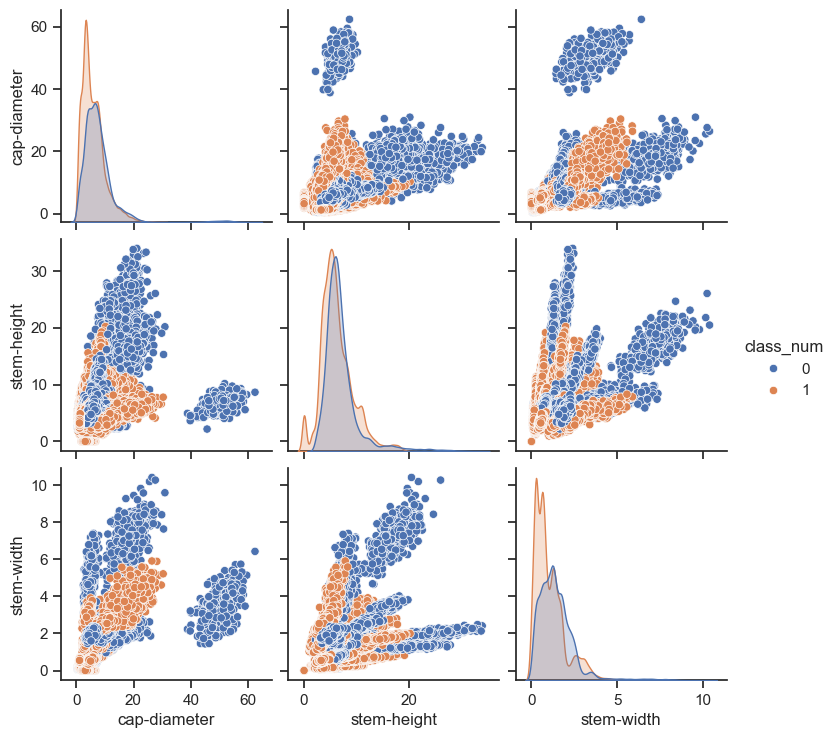

In [799]:
sns.set_theme(style="ticks")
sns.pairplot(df2, hue="class_num")

### Boxplot to Visualize Outlier Distribution

Text(0.5, 1.0, 'Numeric Data Visualization')

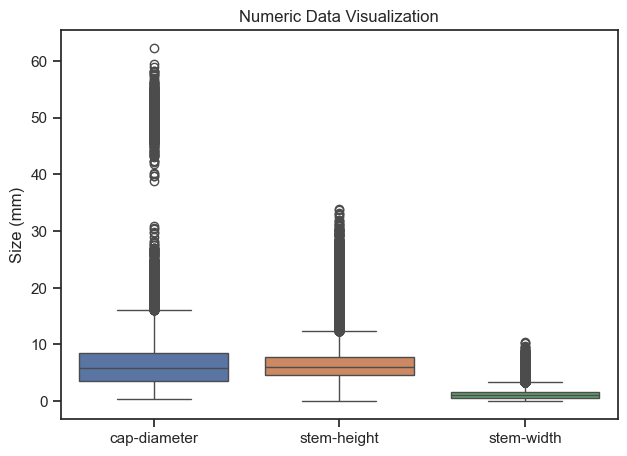

In [800]:
outliar_box = df2.drop(columns=['class_num'])
f=sns.boxplot(outliar_box)
f.set_ylabel('Size (mm)')
f.set_title('Numeric Data Visualization')

### Handling the outliers
From the graphs above, removing outliers would negatively impact the machine learning models performance as we would be removing important feature data for large mushrooms edibility distinction. The following still shows the code to remove these outliers, however the logic is passed over.

In [801]:

def rmIqrOutliar(df,feat):
    """
    Removes outlier datapoints from Dataframe.
    Runs on feature specified.

    Parameters:
        df (pd.Dataframe): pandas Dataframe object
        feat (string): feature name to run method on
                                 ex: 'cat_tail_lengths'.

    Returns:
        (pd.Dataframe): The updated Dataframe with specified column outliers removed.
    """
    # 25th, 75th percentile
    q25,q75 = np.percentile(df[feat],q=25), np.percentile(df[feat],q=75)
    
    iqr = q75-q25
    cut_off = iqr * 1.5

    # Bounds
    lower, upper = q25 - cut_off, q75 + cut_off
    # outliers=df[((df[feat] < lower) | (df[feat] > upper))]
    
    # Drop outliers outside bounds
    df_filter = df.drop(df[(df[feat] < lower) | (df[feat] > upper)].index)
    
    return df_filter

def dfOutlierCycle(df):
    """
    Runs the rmIqrOutliar() function on each numeric feature.

    Parameters:
        df (pd.Dataframe): pandas Dataframe object

    Returns:
        (pd.Dataframe): The updated Dataframe with all columns outliers removed.
    """
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            df = rmIqrOutliar(df,col)
    return df

# Store results in another csv file       
# df_filtered=dfOutlierCycle(df2)
df2.to_csv("mushroom2_outliar_checkpoint.csv")

## Normalize the numeric data into a range of 0.0-1.0
It has been shown and is recommended to normalize numeric data. Normalizing numeric data has been shown to increase model performance and is easy to perform on the dataset.

In [802]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

for col in df2.columns:
    if pd.api.types.is_float_dtype(df2[col]):
        df2[col] = scaler.fit_transform(df2[[col]])

# Show data is now scaled
print(df2.describe())

       cap-diameter   stem-height    stem-width     class_num
count  61069.000000  61069.000000  61069.000000  61069.000000
mean       0.102548      0.194031      0.116922      0.554913
std        0.084972      0.099352      0.096583      0.496979
min        0.000000      0.000000      0.000000      0.000000
25%        0.050032      0.136792      0.050140      0.000000
50%        0.088444      0.175413      0.098066      1.000000
75%        0.131698      0.228184      0.159465      1.000000
max        1.000000      1.000000      1.000000      1.000000


## One-Hot Encoding of Categorical Data
This is where converting the category value codes into their respective names shows its purpose earlier.
The names of the features created here are much more readable. One-Hot encoding is required on string categorical data as the models do not work with string values. This technique changes the categorical values into a boolean feature of the categorical feature value. One value is dropped to represent an all negative of the other categorical value. An example is shown below.

*Before*
|season|
|---|
winter
spring
summer
fall
spring
fall
</td>
<br>

*After*
|season_spring|season_summer|season_fall|
|---|---|---|
|*false*|*false*|*false*|
|**true**|*false*|*false*|
|*false*|**true**|*false*|
|*false*|*false*|**true**|
|**true**|*false*|*false*|
|*false*|*false*|**true**|


In [803]:
# Drop the class feature since we already created class_num
df2.drop(columns=["class"], inplace=True)

# Pandas get_dummies performs one-hot encoding on categorical features
# drop_first reduces the number of features create by one representing for each feature
# the dropped now represents the false for all other features created for the original feature
df_encoded = pd.get_dummies(df2,drop_first=True) 
df_encoded.head(5)

,cap-diameter,stem-height,stem-width,class_num,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_others,cap-shape_spherical,cap-shape_sunken,...,habitat_heaths,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_spring,season_summer,season_winter
0,0.240155,0.499705,0.164469,1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,0.261782,0.530366,0.175055,1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,0.220949,0.524764,0.170725,1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.222563,0.464917,0.153787,1,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.230148,0.487323,0.165528,1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


## Removing Highly Correlated Features
Highly correlated feature are removed to reduce overfitting, model efficiency, and prevent redundancy

### Plot only highly correlated features
Plotted using the seaborn heatmap plot. With many features it will be difficult to spot the highly correlated features. To increase visibility, the plot only plots highly correlated features. Highly correlated percentage was chosen as >0.95

<Axes: >

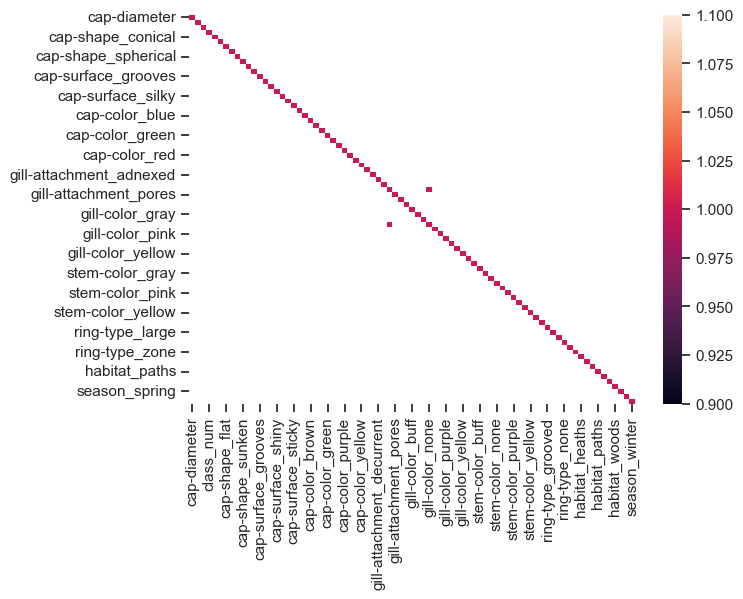

In [804]:
# Compute correlation
cor = df_encoded.corr()
cor_h = cor.copy()

# Filter out features not highly correlated
for col in cor.columns:
    cor_h[col] = cor[col].where((cor[col] > 0.95) | (cor[col] < -0.95),np.nan)

# Plot heatmap of features
sns.heatmap(cor_h)

In [805]:
# Print the highly correlated features
for col in cor_h.columns:
    print(col + '  ' + str([x for x in cor_h.loc[cor_h[col]>0.95].index if len(cor_h.loc[cor_h[col]>0.9].index)>1]))

cap-diameter  []
stem-height  []
stem-width  []
class_num  []
cap-shape_conical  []
cap-shape_convex  []
cap-shape_flat  []
cap-shape_others  []
cap-shape_spherical  []
cap-shape_sunken  []
cap-surface_fibrous  []
cap-surface_fleshy  []
cap-surface_grooves  []
cap-surface_leathery  []
cap-surface_scaly  []
cap-surface_shiny  []
cap-surface_silky  []
cap-surface_smooth  []
cap-surface_sticky  []
cap-surface_wrinkled  []
cap-color_blue  []
cap-color_brown  []
cap-color_buff  []
cap-color_gray  []
cap-color_green  []
cap-color_orange  []
cap-color_pink  []
cap-color_purple  []
cap-color_red  []
cap-color_white  []
cap-color_yellow  []
does-bruise-or-bleed_t  []
gill-attachment_adnexed  []
gill-attachment_decurrent  []
gill-attachment_free  []
gill-attachment_none  ['gill-attachment_none', 'gill-color_none']
gill-attachment_pores  []
gill-attachment_sinuate  []
gill-color_brown  []
gill-color_buff  []
gill-color_gray  []
gill-color_green  []
gill-color_none  ['gill-attachment_none', 'gill-

### Remove Highly Correlated Features

In [806]:
# gill-atachment_none and gill-color_none are the only highly correlated features
# Drop these features
del_cols1=['gill-attachment_none', 'gill-color_none']
df_encoded.drop(columns=del_cols1, inplace=True)

### Save Progress in a CSV file

In [807]:
# Save the processed data to a csv file
df_encoded.to_csv('mushroom_cleaned.csv')

# Model Training
The models chosen are all classification models of which are known to perform well with binary classification problems. The models are as follows. `Logistic Regression`, `SVM`, `AdaBoost`, `Gradient Boosting`, `Decision Tree`, and finally the `Random Forest` model.

## Split Data for model training operations

In [808]:
# Load our cleaned data checkpoint
df = pd.read_csv('mushroom_cleaned.csv', index_col=0)

#Lets split the data
from sklearn.model_selection import train_test_split

y = df['class_num']
X = df.drop(columns=['class_num'])

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33)

## Initial Training
### Initial Training Scoring at a Glance

In [809]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Logistic Regression
logR = LogisticRegression()
logR.fit(X_train,y_train)
print(f'Logistic Regression Score : {100*logR.score(X_test,y_test):0.2f}%')

# SVM
sv = SVC()
sv.fit(X_train,y_train)
print(f'SVM Score : {100*sv.score(X_test,y_test):0.2f}%')

# Adaboost
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
print(f'Adaboost Score : {100*ada.score(X_test,y_test):0.2f}%')

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
print(f'Gradient Boosting Score : {100*gb.score(X_test,y_test):0.2f}%')

# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print(f'Decision Tree Score : {100*tree.score(X_test,y_test):0.2f}%')

# Random Forest
rft = RandomForestClassifier()
rft.fit(X_train,y_train)
print(f'Random Forest Score : {100*rft.score(X_test,y_test):0.2f}%')



Logistic Regression Score : 77.05%
SVM Score : 98.89%
Adaboost Score : 78.59%
Gradient Boosting Score : 90.37%
Decision Tree Score : 99.59%
Random Forest Score : 99.94%


### 5-Fold Cross Validation
Now that we have a rough idea on how the models perform, lets run a 5-fold cross validation on each of the models to get the average performance over multiple runs.

In [810]:
from sklearn.model_selection import cross_validate, KFold

# Model lists
model_list = [logR, sv, ada, gb, tree,rft]
model_list_names = ['LogisticRegression','SVC','AdaBoostClassifier','GradientBoostingClassifier','DecisionTreeClassifier','RandomForestClassifier']

# Compute a 5-fold cross validation for each model and store the performance information in a list
cv_model_info_list = []
for model in model_list:
    cv_model_info_list.append(cross_validate(model,X,y,cv=KFold(shuffle=True)))



In [811]:
# Print the results from the 5-fold cross validation operation on each model
index = 0
for model in cv_model_info_list:
    print(model_list_names[index])
    avg_train_time = cv_model_info_list[index]['fit_time'].mean()
    avg_score_time = cv_model_info_list[index]['score_time'].mean()
    avg_score = cv_model_info_list[index]['test_score'].mean()

    print(f"Average Train Time : {avg_train_time:.4f}")
    print(f"Average Score Time : {avg_score_time:.4f}")
    print(f"Average Score      : {100*avg_score:.2f}")
    print()

    index +=1

LogisticRegression
Average Train Time : 0.3184
Average Score Time : 0.0070
Average Score      : 77.18

SVC
Average Train Time : 17.8013
Average Score Time : 3.8286
Average Score      : 98.92

AdaBoostClassifier
Average Train Time : 2.3922
Average Score Time : 0.1128
Average Score      : 78.18

GradientBoostingClassifier
Average Train Time : 6.9455
Average Score Time : 0.0137
Average Score      : 90.49

DecisionTreeClassifier
Average Train Time : 0.2798
Average Score Time : 0.0064
Average Score      : 99.56

RandomForestClassifier
Average Train Time : 2.9459
Average Score Time : 0.0747
Average Score      : 99.90



### Confusion Matrix
The confusion matrix plainly shows the number of correct and incorrect predictions a model makes. The numbers displayed are the `True Positives`, `True Negatives`, as well as the `False Positives`, and `False Negative` counts.

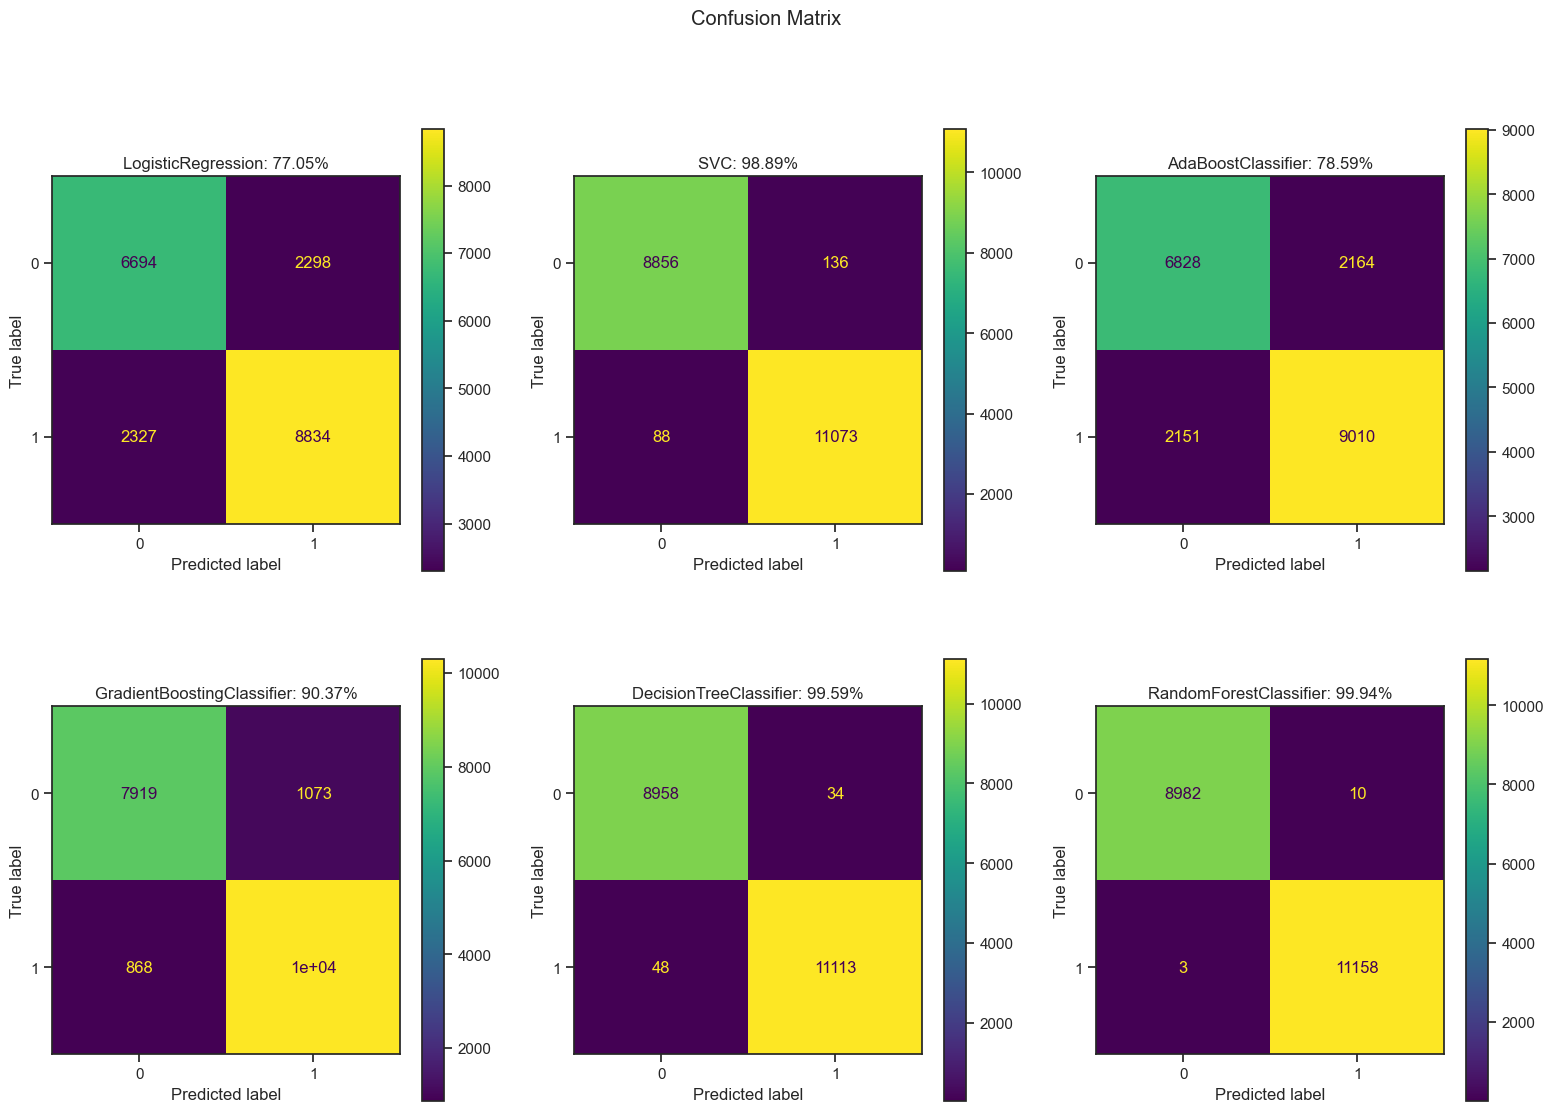

In [812]:
# Training and evaluating
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import plotly.express as px

def cmplot(model,model_name,X_train,X_test,y_train,y_test,axes):
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    cm=confusion_matrix(y_test,pred)

    cm_plot=ConfusionMatrixDisplay(cm)
    cm_plot.plot(ax = axes)
    axes.title.set_text(model_name + ": "+ str(round(score*100,2))+"%")
    
# Setup subplots
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(17,12))

index=0
for i in range(2):
    for j in range(3):
        if index >= len(model_list):
            break
        cmplot(model_list[index],model_list_names[index],X_train,X_test,y_train,y_test,axes[i][j])
        index+=1

fig.suptitle("Confusion Matrix")
plt.show()

### Feature Importance
SVM Feature importance is not available unless using the linear kernal. The default SVC kernal is `rbf`, thus not included here

In [813]:
import plotly.graph_objects as go

# Logistic Regression
coefs = logR.coef_[0]
fig=go.Figure(data=go.Bar(y=coefs,x=X.columns))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},title="Logistic Regression Feature Importances")
fig.show()

In [814]:
# Adaboost
fig=go.Figure(data=go.Bar(y=ada.feature_importances_,x=X.columns))
fig.update_layout(xaxis={'categoryorder':'total descending'},title="Adaboost Feature Importance")
fig.show()

In [815]:
# Gradient Boosting
fig=go.Figure(data=go.Bar(y=gb.feature_importances_,x=X.columns))
fig.update_layout(xaxis={'categoryorder':'total descending'},title="Gradient Boosting Feature Importance")
fig.show()

In [816]:
# Decision Tree
fig=go.Figure(data=go.Bar(y=tree.feature_importances_,x=X.columns))
fig.update_layout(xaxis={'categoryorder':'total descending'},title="Decision Tree Feature Importance")
fig.show()

In [817]:
# Random Forest
fig=go.Figure(data=go.Bar(y=rft.feature_importances_,x=X.columns))
fig.update_layout(xaxis={'categoryorder':'total descending'},title="Random Forest Feature Importance")
fig.show()

### Initial Findings and Impressions
From the first run-through of the models on our processed dataset we can see four out of the six classification models chosen have an accuracy above `90%` and three of those four above `98%`. Of the best performing models, the most important feature each model considers is the `stem-width`. Other numeric features also have a high importance in the fitted models parameters. The best performing model by a small margin is the `Random Forest Classifier` and the slowest is the `SVM` model.

# Reducing Ambiguity
It seems unreasonable to require so many input variables for a user to input. We have already proven the random forest algorithm performs exceptionally well in this task. Our next objective is to try and get a good accuracy with less parameters. The parameters chosen will be ones which are more difficult to measure or distinguish for an average user.  
| Feature |
| :-- |
| cap-shape |
| cap-surface |
| gill-attachment |
| stem-root |
| stem-surface |
| ring-type |

## Adjusting our Dataset
### Reload and remove ambiguous columns

In [818]:
# Reload the cleaned dataset
df_simple = pd.read_csv('mushroom_cleaned.csv', index_col=0)

# Ambiguous feature to remove
del_cols = ['cap-surface', 'gill-attachment', 'stem-root','stem-surface', 'ring-type', 'cap-shape']

# Remove encoded columns that match the list above
for col in df_simple.columns:
    for del_col in del_cols:
        if col.startswith(del_col):
            df_simple.drop(columns=[col],inplace=True)

### Remake inputs and target datasets + Split training and test data

In [819]:
# Remake X and y
y = df_simple['class_num']
X = df_simple.drop(columns=['class_num'])

# Split training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33)

## Retrain Models
### Initial Performance

In [820]:
# Logistic Regression
logR = LogisticRegression()
logR.fit(X_train,y_train)
print(f'Logistic Regression Score : {100*logR.score(X_test,y_test):0.2f}%')

# SVM
sv = SVC()
sv.fit(X_train,y_train)
print(f'SVM Score : {100*sv.score(X_test,y_test):0.2f}%')

# Adaboost
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
print(f'Adaboost Score : {100*ada.score(X_test,y_test):0.2f}%')

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
print(f'Gradient Boosting Score : {100*gb.score(X_test,y_test):0.2f}%')

# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print(f'Decision Tree Score : {100*tree.score(X_test,y_test):0.2f}%')

# Random Forest
rft = RandomForestClassifier()
rft.fit(X_train,y_train)
print(f'Random Forest Score : {100*rft.score(X_test,y_test):0.2f}%')



Logistic Regression Score : 70.12%
SVM Score : 90.93%
Adaboost Score : 72.83%
Gradient Boosting Score : 82.10%
Decision Tree Score : 97.97%
Random Forest Score : 99.41%


### 5-fold Cross Validation

In [821]:
# Model lists
model_list = [logR, sv, ada, gb, tree,rft]
model_list_names = ['LogisticRegression','SVC','AdaBoostClassifier','GradientBoostingClassifier','DecisionTreeClassifier','RandomForestClassifier']

# Compute a 5-fold cross validation for each model and store the performance information in a list
cv_model_info_list = []
for model in model_list:
    cv_model_info_list.append(cross_validate(model,X,y,cv=KFold(shuffle=True)))


In [822]:
# Print the results from the 5-fold cross validation operation on each model
index = 0
for model in cv_model_info_list:
    print(model_list_names[index])
    avg_train_time = cv_model_info_list[index]['fit_time'].mean()
    avg_score_time = cv_model_info_list[index]['score_time'].mean()
    avg_score = cv_model_info_list[index]['test_score'].mean()

    print(f"Average Train Time : {avg_train_time:.4f}")
    print(f"Average Score Time : {avg_score_time:.4f}")
    print(f"Average Score      : {100*avg_score:.2f}")
    print()

    index +=1

LogisticRegression
Average Train Time : 0.1427
Average Score Time : 0.0052
Average Score      : 70.49

SVC
Average Train Time : 35.1402
Average Score Time : 9.9404
Average Score      : 91.10

AdaBoostClassifier
Average Train Time : 2.0502
Average Score Time : 0.1023
Average Score      : 73.01

GradientBoostingClassifier
Average Train Time : 5.8362
Average Score Time : 0.0146
Average Score      : 83.60

DecisionTreeClassifier
Average Train Time : 0.2510
Average Score Time : 0.0056
Average Score      : 98.31

RandomForestClassifier
Average Train Time : 3.2398
Average Score Time : 0.0909
Average Score      : 99.42



### Confusion Matrix

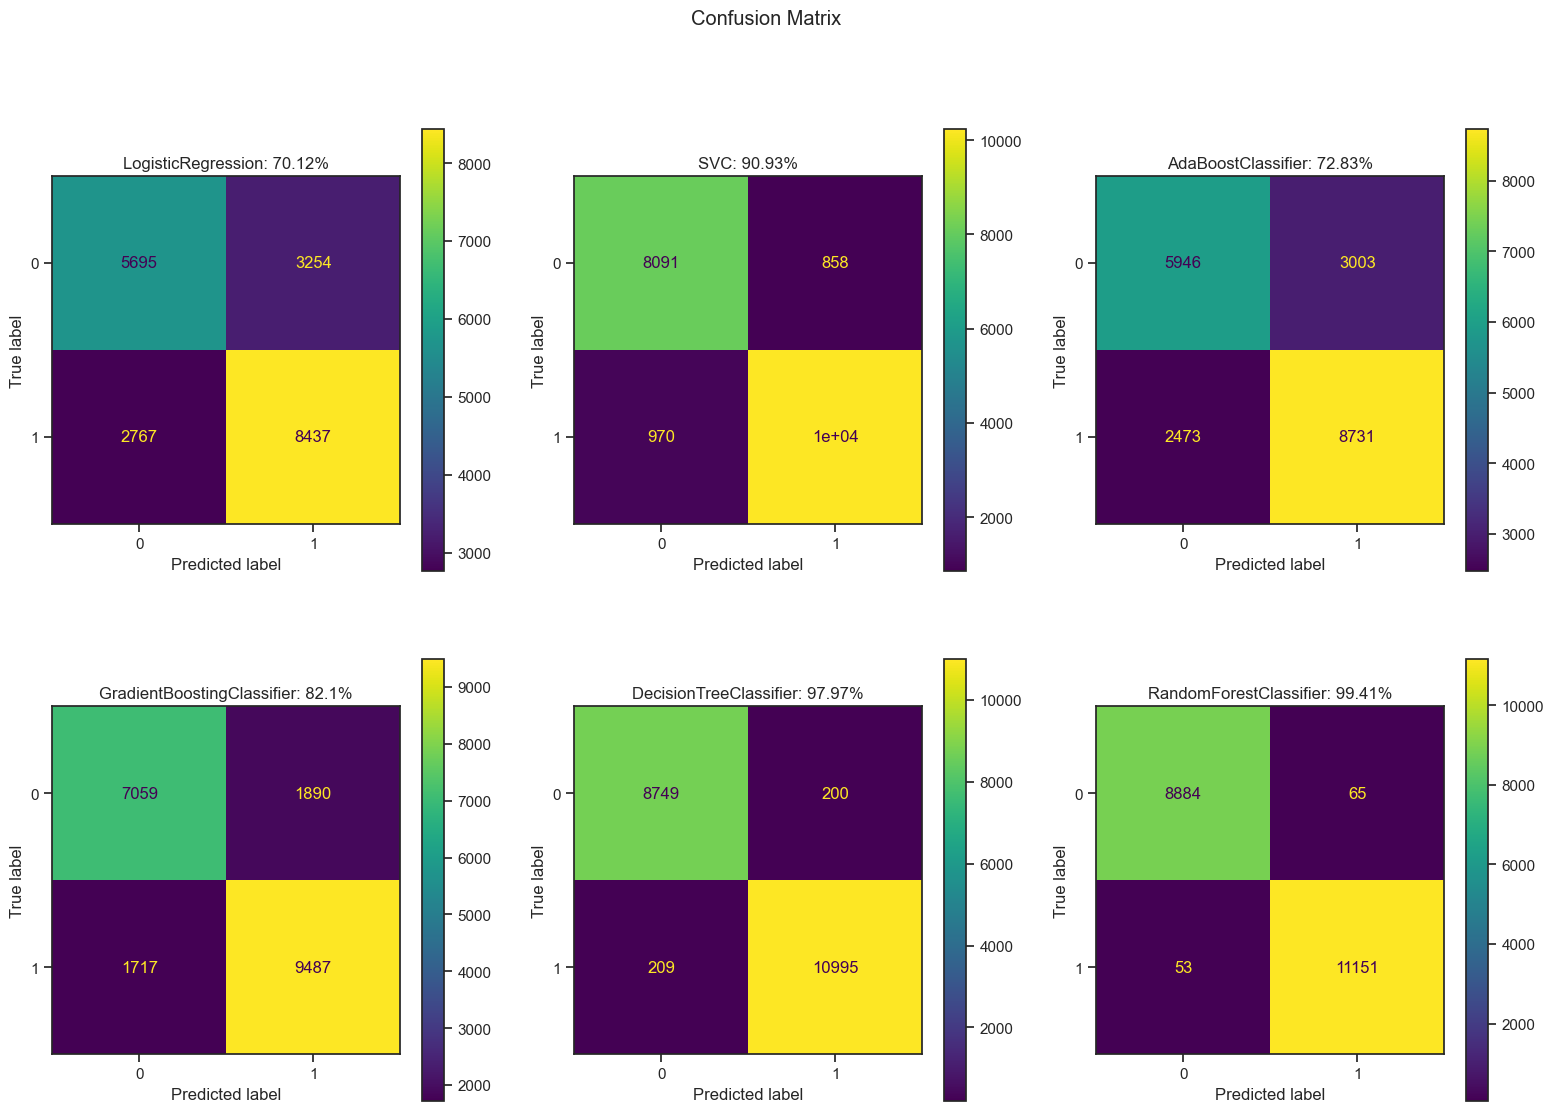

In [823]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(17,12))

index=0
for i in range(2):
    for j in range(3):
        if index >= len(model_list):
            break
        cmplot(model_list[index],model_list_names[index],X_train,X_test,y_train,y_test,axes[i][j])
        index+=1
plt.suptitle('Confusion Matrix')        
plt.show()

### Bar plot of Accuracy Scores

In [824]:
# Setup subplot figure
fig = make_subplots(rows=1, cols=1)

avg_scores = []

# Compute average scores from the 5-fold cross validation metrics computed earlier
index = 0
for model in cv_model_info_list:
    avg_train_time = cv_model_info_list[index]['fit_time'].mean()
    avg_score_time = cv_model_info_list[index]['score_time'].mean()
    avg_score = cv_model_info_list[index]['test_score'].mean()
    avg_scores.append(avg_score)
    index +=1

# Make plot
fig.add_trace(go.Bar(x=model_list_names, y=avg_scores,text=avg_scores,
                marker=dict(color=[1, 2, 3, 4, 5, 6])),
            1, 1)
    
fig.update_layout(
        title_text='Model Accuracy',
        yaxis_title='Accuracy',
        showlegend=False
        )  

fig.show()

## Updated Findings
While trying to reduce ambiguity in our dataset, there is a clear drop off in some of the models performance. The decision tree, random forest, and SVM models saw the least impact of the reduction in features while the rest observes a roughly 7% decrease in accuracy.

# Hypertuning
A good way to optimize the performance of our models to the problem is hyperparameter tuning. The idea is to run the model iteratively, changing the model parameters with each iteration and checking the results. At the end we end up with a list of best parameters for each of the models. The `RandomizedSearchCV` class performs a fit and score method on with randomized parameters defined.<br> **NOTE** this was **NOT** run on the SVM model as the training time is unreasonable for the performance compared to the other models tested earlier.

## Parameter setup
The parameters chosen to adjust are the most common ones listed in the sklearn documentation.

In [825]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['lbfgs','newton-cg','liblinear','sag','saga']
C_vals = [float(x) for x in np.arange(1, 100, 5)]
c_extra = [0.01,0.1,0.5,0.8]
for i in c_extra:
    C_vals.append(i)

random_grid_lr = [    
    {
        'penalty' : penalty,
        'C' : C_vals,
        'solver' : solver
    }
]

# SVC
# kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# gamma = ['scale','auto']
# C_vals = [1,10,100,1000]

# random_grid_svc = [    
#     {
#         'kernel' : kernel,
#         'C' : C_vals,
#         'gamma' : gamma
#     }
# ]


# AdaBoost
n_estimators = [int(x) for x in np.arange(10, 500, 10)]
learning_rate = [float(x) for x in np.arange(0.0,5,0.5)]
random_grid_ada = [    
    {
        'n_estimators': n_estimators,
        'learning_rate':learning_rate
    }
]

# Gradient Boost
loss = ['log_loss','exponential']
learning_rate = [float(x) for x in np.arange(0.0,2,0.05)]
n_estimators = [int(x) for x in np.arange(10,200,10)]
max_depth = [int(x) for x in np.arange(1,32,1)]

random_grid_gbc = [
    {
        'loss': loss,
        'learning_rate':learning_rate,
        'n_estimators':n_estimators,
        'max_depth':max_depth
    }
    
]

# Decision Tree
criterion=["gini", "entropy", "log_loss"]
splitter =['best','random']
max_depth = [int(x) for x in np.arange(1,32,1)]
min_samples_split = [int(x) for x in np.arange(2,10,2)]
min_samples_leaf = [int(x) for x in np.arange(2,10,2)]

random_grid_dtc = [
    {
        'criterion':criterion,
        'splitter':splitter,
        'max_depth':max_depth,
        'min_samples_leaf':min_samples_leaf,
        'min_samples_split':min_samples_split
    }
]

# Random Forest Classifier
n_estimators = [int(x) for x in np.arange(10, 200, 10)]
max_depth = [int(x) for x in np.arange(8, 80, 8)]
max_depth.append(None)
criterion=["gini", "entropy", "log_loss"]
bootstrap = [True,False]

random_grid_rfc = [    
    {'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'criterion' : criterion,
    'bootstrap' : bootstrap
    }
]

## Hypertuning Training

In [826]:
# Hypertuning

# Logistic Regression
lr_random = RandomizedSearchCV(estimator=logR, param_distributions=random_grid_lr,scoring='accuracy',cv=KFold(shuffle=True),n_iter=100, n_jobs=-1, random_state=88)
lr_random.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions=[{'C': [1.0, 6.0, 11.0, 16.0, 21.0, 26.0,
                                               31.0, 36.0, 41.0, 46.0, 51.0,
                                               56.0, 61.0, 66.0, 71.0, 76.0,
                                               81.0, 86.0, 91.0, 96.0, 0.01,
                                               0.1, 0.5, 0.8],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   random_state=88, scoring='accuracy')

In [828]:
# AdaBoost
ada_random = RandomizedSearchCV(estimator=ada, param_distributions=random_grid_ada,scoring='accuracy',cv=KFold(shuffle=True),n_iter=100, n_jobs=-1, random_state=88)
ada_random.fit(X_train,y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions=[{'learning_rate': [0.0, 0.5, 1.0, 1.5,
                                                           2.0, 2.5, 3.0, 3.5,
                                                           4.0, 4.5],
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, 120, 130, 140,
                                                          150, 160, 170, 180,
                                                          190, 200, 210, 220,
                                                          230, 240, 250, 260,
                                                          270, 280, 290, 300, ...]}],
                   random_state=88, scoring='accuracy')

In [829]:
# Gradient Boost
gbc_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid_gbc,scoring='accuracy',cv=KFold(shuffle=True),n_iter=100, n_jobs=-1, random_state=88)
gbc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'learning_rate': [0.0, 0.05, 0.1,
                                                           0.15000000000000002,
                                                           0.2, 0.25,
                                                           0.30000000000000004,
                                                           0.35000000000000003,
                                                           0.4, 0.45, 0.5, 0.55,
                                                           0.6000000000000001,
                                                           0.65,
                                                           0.7000000000000001,
                                                           0.75, 0.8,
                                                           0.8500000000000001,
                                                           0.9,
                                                           0.950...
                                                           1.0, 1.05, 1.1,
                                                           1.1500000000000001,
                                                           1.2000000000000002,
                                                           1.25, 1.3, 1.35,
                                                           1.4000000000000001,
                                                           1.4500000000000002, ...],
                                         'loss': ['log_loss', 'exponential'],
                                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...],
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, 120, 130, 140,
                                                          150, 160, 170, 180,
                                                          190]}],
                   random_state=88, scoring='accuracy')

In [830]:
# Decision Tree
dtc_random = RandomizedSearchCV(estimator=tree, param_distributions=random_grid_dtc,scoring='accuracy',cv=KFold(shuffle=True),n_iter=100, n_jobs=-1, random_state=88)
dtc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...],
                                         'min_samples_leaf': [2, 4, 6, 8],
                                         'min_samples_split': [2, 4, 6, 8],
                                         'splitter': ['best', 'random']}],
                   random_state=88, scoring='accuracy')

In [831]:
# Random Forest
rfc_random = RandomizedSearchCV(estimator=rft, param_distributions=random_grid_rfc,scoring='accuracy',cv=KFold(shuffle=True),n_iter=100, n_jobs=-1, random_state=88)
rfc_random.fit(X_train,y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'max_depth': [8, 16, 24, 32, 40, 48,
                                                       56, 64, 72, None],
                                         'n_estimators': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, 120, 130, 140,
                                                          150, 160, 170, 180,
                                                          190]}],
                   random_state=88, scoring='accuracy')

## Hypertuned Models Performance

In [832]:

lr_pred=lr_random.best_estimator_.predict(X_test)
rfc_pred=rfc_random.best_estimator_.predict(X_test)
ada_pred=ada_random.best_estimator_.predict(X_test)
gbc_pred=gbc_random.best_estimator_.predict(X_test)
dtc_pred=dtc_random.best_estimator_.predict(X_test)

lr_score = accuracy_score(y_test,lr_pred)
# svc_score = accuracy_score(y_test,svc_pred)
rfc_score = accuracy_score(y_test,rfc_pred)
ada_score = accuracy_score(y_test,ada_pred)
gbc_score = accuracy_score(y_test,gbc_pred)
dtc_score = accuracy_score(y_test,dtc_pred)


print("Logistic Regression \nAccuracy: %.2f %%" %(100.0*lr_score))
print("")
print("AdaBoost \nAccuracy: %.2f %%" %(100.0*ada_score))
print("")
print("Gradient Boost \nAccuracy: %.2f %%" %(100.0*gbc_score))
print("")
print("Decision Tree \nAccuracy: %.2f %%" %(100.0*dtc_score))
print("")
print("Random Forest \nAccuracy: %.2f %%" %(100.0*rfc_score))
print("")

Logistic Regression 
Accuracy: 70.12 %

AdaBoost 
Accuracy: 73.55 %

Gradient Boost 
Accuracy: 99.39 %

Decision Tree 
Accuracy: 98.35 %

Random Forest 
Accuracy: 99.38 %



### Graphic of Before and After Hypertuning
Again SVC did not have hypertuning performed on it, but was included for comparison.

In [833]:
# Graph the scores

avg_scores_after_hypertune = [lr_score,cv_model_info_list[1]['test_score'].mean(),ada_score,gbc_score,dtc_score,rfc_score]

fig = make_subplots(rows=1, cols=1)
index = 0

fig.add_trace(go.Bar(x=model_list_names, y=avg_scores,text=avg_scores,
                marker=dict(color=[1, 2, 3, 4, 5, 6], opacity=0.7), name='Before',),
            1, 1)
fig.add_trace(go.Bar(x=model_list_names, y=avg_scores_after_hypertune,text=avg_scores_after_hypertune,
                marker=dict(color=[1, 2, 3, 4, 5, 6],pattern_shape='x', pattern_size=5), name='After'),
            1, 1)
fig.update_layout(
        title_text='Model Accuracy Before and After Hypertuning',
        yaxis_title='Accuracy',
        showlegend=False
        )  

fig.show()

### Hypertuned Best Parameters
List the best parameters for each model from hypertuning process

In [834]:
lr_random.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}

In [835]:
ada_random.best_params_

{'n_estimators': 200, 'learning_rate': 1.0}

In [836]:
gbc_random.best_params_

{'n_estimators': 160,
 'max_depth': 12,
 'loss': 'log_loss',
 'learning_rate': 0.4}

In [837]:
dtc_random.best_params_

{'splitter': 'random',
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 27,
 'criterion': 'gini'}

In [838]:
rfc_random.best_params_

{'n_estimators': 180,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

### Hypertuned Model Feature Importance
Retrain models with best parameters found. The best parameters are listed above.

In [839]:
# Logistic Regression
# {'solver': 'liblinear', 'penalty': 'l1', 'C': 61.0}
logR_bp = LogisticRegression(solver='liblinear',penalty='l1',C=61.0)
logR_bp.fit(X_train,y_train)
print(f'Logistic Regression Score : {100*logR_bp.score(X_test,y_test):0.2f}%')

# Adaboost
# {'n_estimators': 220, 'learning_rate': 2.0}
ada_bp = AdaBoostClassifier(n_estimators=220,learning_rate=2.0)
ada_bp.fit(X_train,y_train)
print(f'Adaboost Score : {100*ada.score(X_test,y_test):0.2f}%')

# Gradient Boosting
# {'n_estimators': 90,
#  'max_depth': 9,
#  'loss': 'exponential',
#  'learning_rate': 1.7000000000000002}
gb_bp = GradientBoostingClassifier(n_estimators=90,max_depth=9,loss='exponential',learning_rate=1.7000000000000002)
gb_bp.fit(X_train,y_train)
print(f'Gradient Boosting Score : {100*gb_bp.score(X_test,y_test):0.2f}%')

# Decision Tree
# {'splitter': 'best',
#  'min_samples_split': 4,
#  'min_samples_leaf': 2,
#  'max_depth': 25,
#  'criterion': 'entropy'}
tree_bp = DecisionTreeClassifier(splitter='best',min_samples_split=4,min_samples_leaf=2,max_depth=25,criterion='entropy')
tree_bp.fit(X_train,y_train)
print(f'Decision Tree Score : {100*tree_bp.score(X_test,y_test):0.2f}%')

# Random Forest
# {'n_estimators': 140, 'max_depth': 64, 'criterion': 'gini', 'bootstrap': False}
rft_bp = RandomForestClassifier(n_estimators=140,max_depth=64,criterion='gini',bootstrap=False)
rft_bp.fit(X_train,y_train)
print(f'Random Forest Score : {100*rft_bp.score(X_test,y_test):0.2f}%')

Logistic Regression Score : 70.16%
Adaboost Score : 72.83%
Gradient Boosting Score : 99.29%
Decision Tree Score : 98.30%
Random Forest Score : 99.40%


### Feature Importance Charts
A majority of the models prefer the numeric features. Specifically the `cap-diameter`, `stem-width`, and `stem-height`.

In [ ]:
# Logistic Regression
coefs = logR_bp.coef_[0]
fig=go.Figure(data=go.Bar(y=coefs,x=X.columns))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},title="Logistic Regression Feature Importances")
fig.show()

Index(['cap-diameter', 'stem-height', 'stem-width', 'cap-color_blue',
       'cap-color_brown', 'cap-color_buff', 'cap-color_gray',
       'cap-color_green', 'cap-color_orange', 'cap-color_pink',
       'cap-color_purple', 'cap-color_red', 'cap-color_white',
       'cap-color_yellow', 'does-bruise-or-bleed_t', 'gill-color_brown',
       'gill-color_buff', 'gill-color_gray', 'gill-color_green',
       'gill-color_orange', 'gill-color_pink', 'gill-color_purple',
       'gill-color_red', 'gill-color_white', 'gill-color_yellow',
       'stem-color_blue', 'stem-color_brown', 'stem-color_buff',
       'stem-color_gray', 'stem-color_green', 'stem-color_none',
       'stem-color_orange', 'stem-color_pink', 'stem-color_purple',
       'stem-color_red', 'stem-color_white', 'stem-color_yellow',
       'has-ring_ring', 'habitat_heaths', 'habitat_leaves', 'habitat_meadows',
       'habitat_paths', 'habitat_urban', 'habitat_waste', 'habitat_woods',
       'season_spring', 'season_summer', 'season_wi

In [841]:
# Adaboost
fig=go.Figure(data=go.Bar(y=ada_bp.feature_importances_,x=X.columns))
fig.update_layout(xaxis={'categoryorder':'total descending'},title="Adaboost Feature Importance")
fig.show()

In [842]:
# Gradient Boosting
fig=go.Figure(data=go.Bar(y=gb_bp.feature_importances_,x=X.columns))
fig.update_layout(xaxis={'categoryorder':'total descending'},title="Gradient Boosting Feature Importance")
fig.show()

In [843]:
# Decision Tree
fig=go.Figure(data=go.Bar(y=tree_bp.feature_importances_,x=X.columns))
fig.update_layout(xaxis={'categoryorder':'total descending'},title="Decision Tree Feature Importance")
fig.show()

In [844]:
# Random Forest
fig=go.Figure(data=go.Bar(y=rft_bp.feature_importances_,x=X.columns))
fig.update_layout(xaxis={'categoryorder':'total descending'},title="Random Forest Feature Importance")
fig.show()

### Area Under Curve Plots

Unable to compute probability array from: SVC


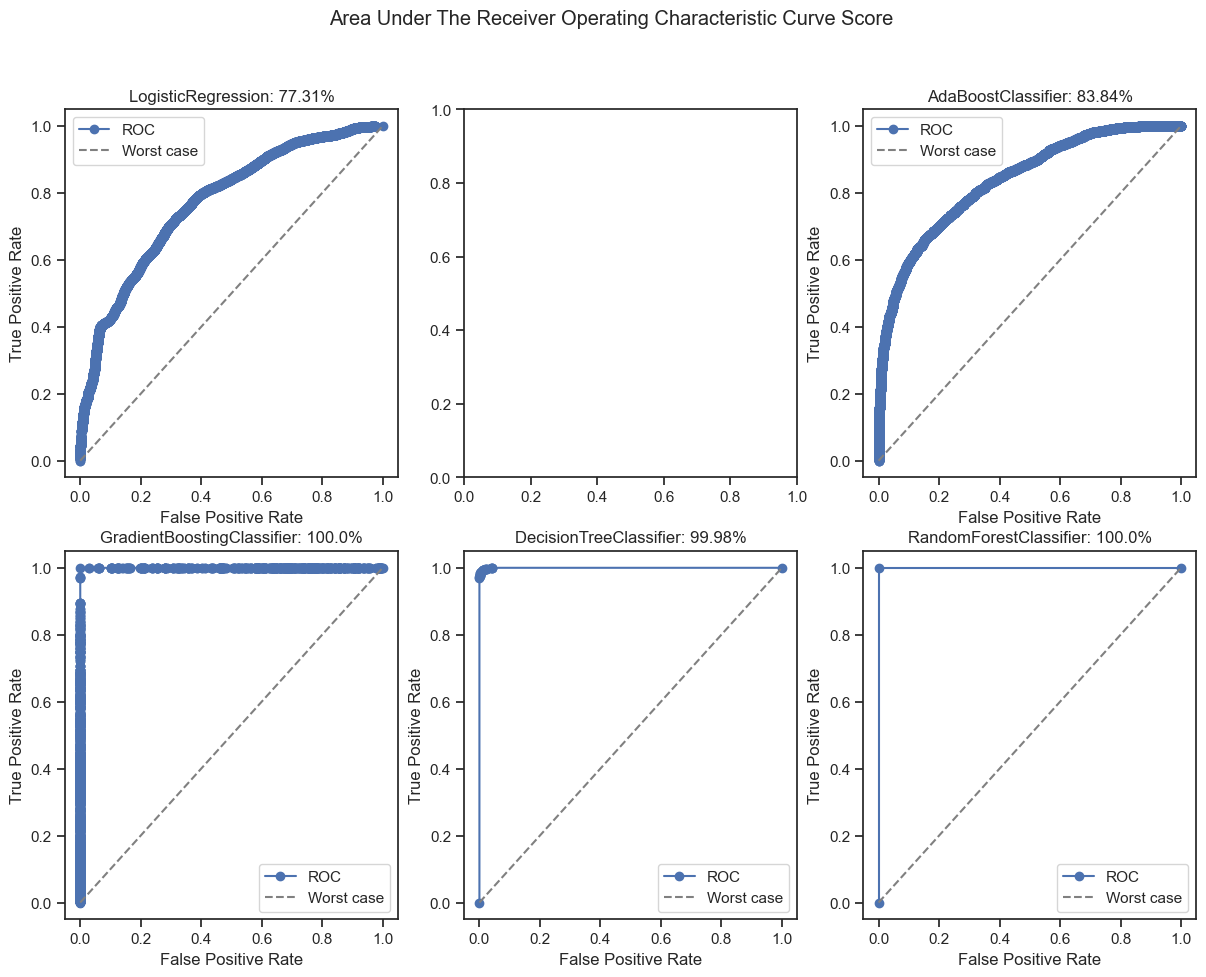

In [845]:
#Area under curve analysis
from sklearn.metrics import roc_auc_score, roc_curve

def aucplot(model,model_name,X_test,y_test,ax):
    """
    Plots the area under curve on the input figure axes.

    Parameters:
        model (list): List of trained models.

        model_name (list): List of trained model names (string).

        X_test (pd.Dataframe): Test feature data from split dataset.

        y_test (pd.Dataframe): Test target data from split dataset.

        ax (~matplotlib.axes.Axes): Axes of plot figure.

    """
    # Get the prediction probabilities
    try:
        pred_probs = model.predict_proba(X_test)[:,1]
    except:
        print(f"Unable to compute probability array from: {model_name}")
        return
    # False positive rate and True positive rate arrays
    fpr, tpr, _ = roc_curve(y_test, pred_probs)

    # Area under the receiver operating characteristic curve score
    roc_auc = roc_auc_score(y_test,pred_probs)
    
    # Plot the AUC
    ax.plot(fpr, tpr, 'o-', label='ROC')
    ax.plot([0, 1], [0, 1], '--', color='grey', label='Worst case')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
    ax.title.set_text(model_name + ": "+ str(round(roc_auc*100,2))+"%")

# Model list
model_list3 = [lr_random,sv,ada_random,gbc_random,dtc_random,rfc_random]

# Figure setup
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(13,10))

index=0
for i in range(2):
    for j in range(3):
        aucplot(model_list3[index],model_list_names[index],X_train,y_train,ax[i][j])
        index+=1
fig.suptitle("Area Under The Receiver Operating Characteristic Curve Score")
plt.show()

### Confusion Matrix of Hypertuned Models

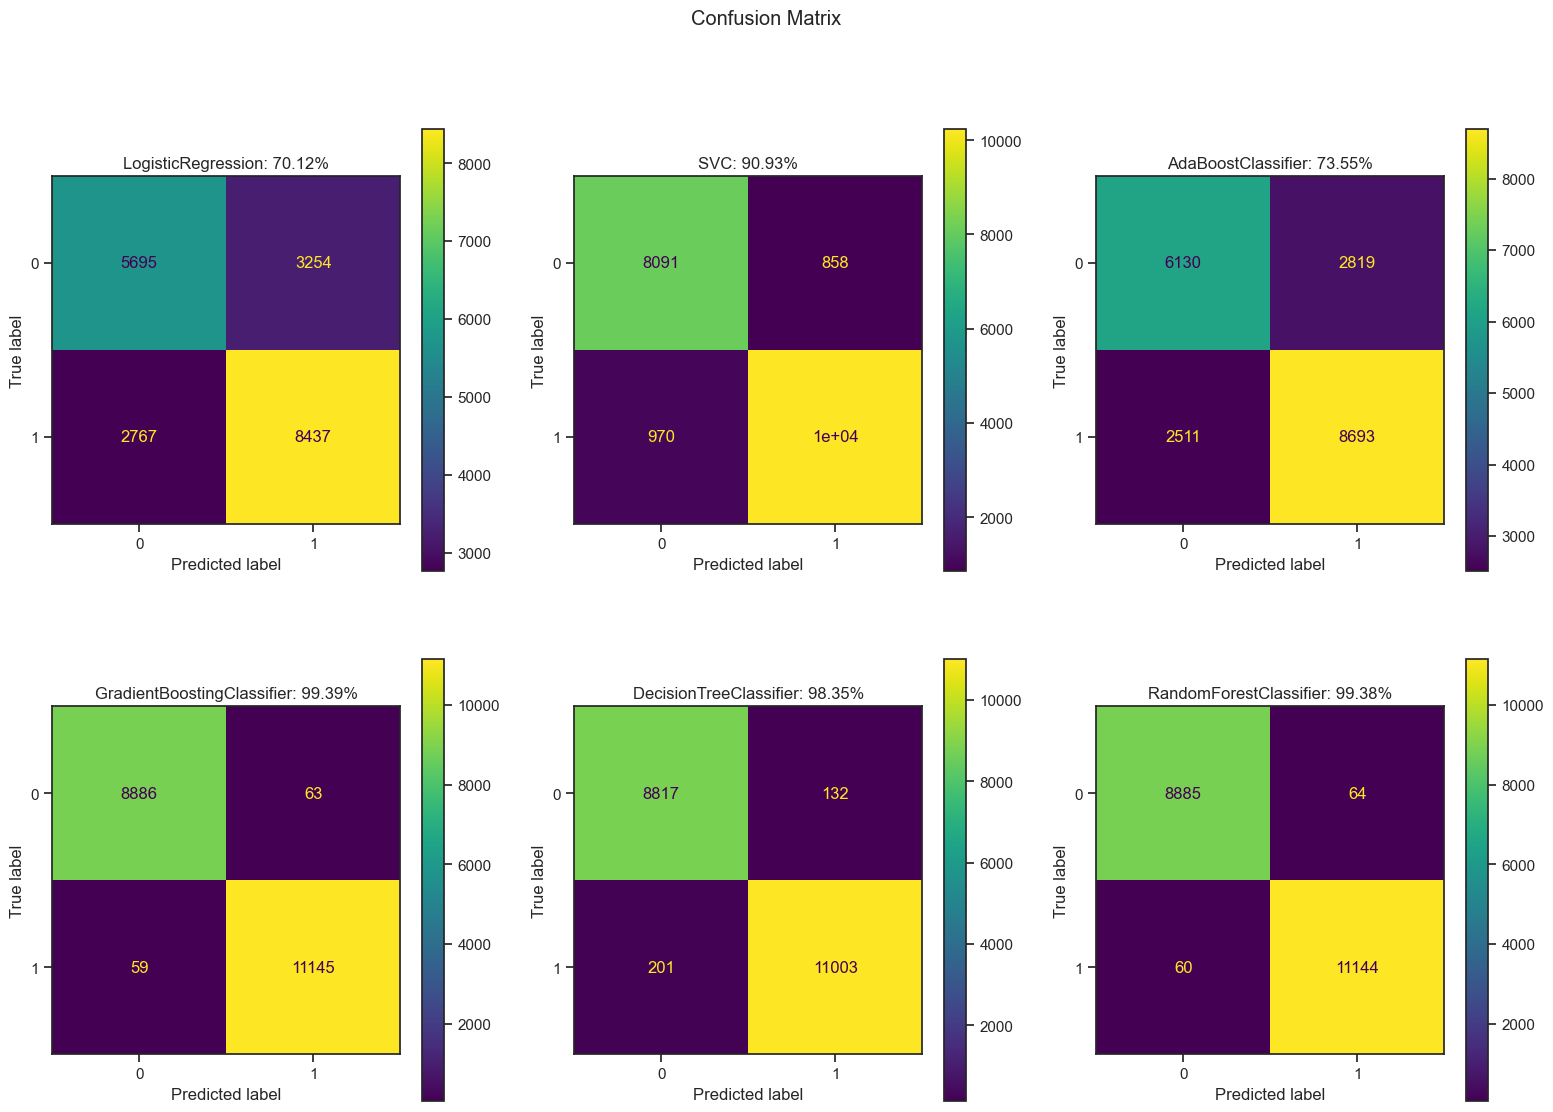

In [846]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(17,12))

index=0
for i in range(2):
    for j in range(3):
        if index >= len(model_list):
            break
        cmplot(model_list3[index],model_list_names[index],X_train,X_test,y_train,y_test,axes[i][j])
        index+=1
fig.suptitle("Confusion Matrix")
plt.show()

# Model Performance Metrics
## Metrics Setup
### Accuracy

In [847]:
def accuracy(y_true, y_pred):

    """
    Returns a accuracy score for two 1D numpy array of the same length.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).

    Returns:
        (float): Accuracy score of y_true and y_pred.
    """

    # num of correct/total num of values
    accuracy = np.equal(y_true, y_pred).sum()/y_true.shape[0]

    return accuracy

### Prediction Performance Counts

In [848]:
def count_false_positives(y_true, y_pred):

    """
    Returns the number of false positives.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).

    Returns:
        (int): The number of false positives detected.
    """

    # true = 0 and pred = 1
    fp = np.logical_and(y_true==0,y_pred==1).sum()

    return fp

def count_false_negatives(y_true, y_pred):

    """
    Returns the number of false negatives.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).

    Returns:
        (int): The number of false negatives detected.
    """

    # true = 1 and pred = 0
    fn = np.logical_and(y_true==1,y_pred==0).sum()

    return fn

def count_true_positives(y_true, y_pred):

    """
    Returns the number of true positives.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).

    Returns:
        (int): The number of true positives detected.
    """

    # true = 1 and pred = 1
    tp = np.logical_and(y_true==1,y_pred==1).sum()

    return tp

def count_true_negatives(y_true, y_pred):

    """
    Returns the number of false negatives.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).

    Returns:
        (int): The number of true negatives detected.
    """

    # true = 0 and pred = 0
    tn = np.logical_and(y_true==0,y_pred==0).sum()

    return tn

### Precision, Recall, False Alarm Rate, False Negative Rate

In [849]:
def precision(y_true, y_pred):

    """
    Returns the precision score.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).

    Returns:
        (float): The precision.
    """

    # TP/(TP+FP)
    precision = count_true_positives(y_true, y_pred)/(count_true_positives(y_true, y_pred)+count_false_positives(y_true, y_pred))

    return precision

def recall(y_true, y_pred):

    """
    Returns the recall score.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).

    Returns:
        (float): The recall.
    """

    # TP/(TP+FN)
    recall = count_true_positives(y_true, y_pred)/(count_true_positives(y_true, y_pred)+count_false_negatives(y_true, y_pred))

    return recall

def false_alarm_rate(y_true, y_pred):

    """
    Returns the false alarm rate.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).

    Returns:
        (float): The false positive rate.
    """

    # FP/(FP+TN)
    far = count_false_positives(y_true, y_pred)/(count_false_positives(y_true, y_pred)+count_true_negatives(y_true, y_pred))

    return far

def false_negative_rate(y_true, y_pred):
    fnr = count_false_negatives(y_true, y_pred)/(count_false_negatives(y_true, y_pred)+count_true_positives(y_true, y_pred))
    return fnr

### F-Beta

In [850]:
def f_beta(y_true, y_pred, beta):

    """
    Returns the F-beta score.

    Parameters:
        y_true (1D numpy array): 1D array of true binary labels
                                 np.array([0, 1, 0, 0, ..]).
        y_pred (1D numpy array): 1D array of predicted binary labels
                                 np.array([1, 0, 0, 1, ..]).
        beta (float): The beta parameter for the F-beta metric.

    Returns:
        (float): The F-beta score.
    """

    # Write your code here
    # (1+b^2)(precision*recall)/(b^2*precision+recall)
    f_beta = (1+beta**2)*(precision(y_true,y_pred)*recall(y_true,y_pred))/\
     (beta**2*precision(y_true,y_pred)+recall(y_true,y_pred))

    return f_beta

### Model Lists

In [851]:
model_list = [logR, sv, ada, gb, tree, rft]
model_list_hypertuned = [lr_random, sv, ada_random, gbc_random, dtc_random, rfc_random]
model_list_names = ['LogisticRegression', 'SVC','AdaBoostClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']

## Before Hypertuning Performance

In [852]:
y_true = y_test.values.flatten()

i=0
accuracy_scores = []
precision_scores = []
recall_scores = []
fpr_scores = []
fnr_scores = []
f1_scores = []


for model in model_list:
    print(model_list_names[i])

    # Calc metrics
    accuracy_scores.append(accuracy(y_true, model.predict(X_test)))
    precision_scores.append(precision(y_true, model.predict(X_test)))
    recall_scores.append(recall(y_true, model.predict(X_test)))
    fpr_scores.append(false_alarm_rate(y_true, model.predict(X_test)))
    fnr_scores.append(false_negative_rate(y_true, model.predict(X_test)))
    f1_scores.append(f_beta(y_true, model.predict(X_test), beta=1))
    
    # Print metrics
    print('Accuracy {:.3f}'.format(accuracy_scores[i]))
    print('Precision: {:.3f}'.format(precision_scores[i]))
    print('Recall: {:.3f}'.format(recall_scores[i]))
    print('False Alarm Rate: {:.3f}'.format(fpr_scores[i]))
    print('False Negative Rate: {:.3f}'.format(fnr_scores[i]))
    print("F1 Score: {:.3f}\n".format(f1_scores[i]))
    print()
    i+=1


LogisticRegression
Accuracy 0.701
Precision: 0.722
Recall: 0.753
False Alarm Rate: 0.364
False Negative Rate: 0.247
F1 Score: 0.737


SVC
Accuracy 0.909
Precision: 0.923
Recall: 0.913
False Alarm Rate: 0.096
False Negative Rate: 0.087
F1 Score: 0.918


AdaBoostClassifier
Accuracy 0.728
Precision: 0.744
Recall: 0.779
False Alarm Rate: 0.336
False Negative Rate: 0.221
F1 Score: 0.761


GradientBoostingClassifier
Accuracy 0.821
Precision: 0.834
Recall: 0.847
False Alarm Rate: 0.211
False Negative Rate: 0.153
F1 Score: 0.840


DecisionTreeClassifier
Accuracy 0.980
Precision: 0.982
Recall: 0.981
False Alarm Rate: 0.022
False Negative Rate: 0.019
F1 Score: 0.982


RandomForestClassifier
Accuracy 0.994
Precision: 0.994
Recall: 0.995
False Alarm Rate: 0.007
False Negative Rate: 0.005
F1 Score: 0.995




## After Hypertuning Performance

In [853]:
y_true = y_test.values.flatten()

i=0
accuracy_scores_ah = []
precision_scores_ah = []
recall_scores_ah = []
fpr_scores_ah = []
fnr_scores_ah = []
f1_scores_ah = []


for model in model_list_hypertuned:
    print(model_list_names[i])

    # Calc metrics
    accuracy_scores_ah.append(accuracy(y_true, model.predict(X_test)))
    precision_scores_ah.append(precision(y_true, model.predict(X_test)))
    recall_scores_ah.append(recall(y_true, model.predict(X_test)))
    fpr_scores_ah.append(false_alarm_rate(y_true, model.predict(X_test)))
    fnr_scores_ah.append(false_negative_rate(y_true, model.predict(X_test)))
    f1_scores_ah.append(f_beta(y_true, model.predict(X_test), beta=1))
    
    # Print metrics
    print('Accuracy {:.3f}'.format(accuracy_scores_ah[i]))
    print('Precision: {:.3f}'.format(precision_scores_ah[i]))
    print('Recall: {:.3f}'.format(recall_scores_ah[i]))
    print('False Alarm Rate: {:.3f}'.format(fpr_scores_ah[i]))
    print('False Negative Rate: {:.3f}'.format(fnr_scores_ah[i]))
    print("F1 Score: {:.3f}\n".format(f1_scores_ah[i]))
    print()
    i+=1



LogisticRegression
Accuracy 0.701
Precision: 0.722
Recall: 0.753
False Alarm Rate: 0.364
False Negative Rate: 0.247
F1 Score: 0.737


SVC
Accuracy 0.909
Precision: 0.923
Recall: 0.913
False Alarm Rate: 0.096
False Negative Rate: 0.087
F1 Score: 0.918


AdaBoostClassifier
Accuracy 0.736
Precision: 0.755
Recall: 0.776
False Alarm Rate: 0.315
False Negative Rate: 0.224
F1 Score: 0.765


GradientBoostingClassifier
Accuracy 0.994
Precision: 0.994
Recall: 0.995
False Alarm Rate: 0.007
False Negative Rate: 0.005
F1 Score: 0.995


DecisionTreeClassifier
Accuracy 0.983
Precision: 0.988
Recall: 0.982
False Alarm Rate: 0.015
False Negative Rate: 0.018
F1 Score: 0.985


RandomForestClassifier
Accuracy 0.994
Precision: 0.994
Recall: 0.995
False Alarm Rate: 0.007
False Negative Rate: 0.005
F1 Score: 0.994




## Final Performance Metrics

### Performance Comparison Plot Before and After Hypertuning
There are very small improvements to the already top performing models and large improvement to the Gradient Boosting model.

In [854]:
# Graph the scores

# Make a list of the performance metric names
performance_metric_names = ['accuracy',
                         'precision',
                         'recall',
                         'false_alarm_rate',
                         'false_negative_rate',
                         'f1']
performance_metric_list = [accuracy_scores,
                           precision_scores,
                           recall_scores,
                           fpr_scores,
                           fnr_scores,
                           f1_scores]

performance_metric_list_ah = [accuracy_scores_ah,
                           precision_scores_ah,
                           recall_scores_ah,
                           fpr_scores_ah,
                           fnr_scores_ah,
                           f1_scores_ah]


# Create a subplot grid with ? rows and 3 columns
fig = make_subplots(rows=2, cols=3,subplot_titles=performance_metric_names)

r=1
c=1

# Iterate through the performance metric types
index =0
for p_name in performance_metric_names:
    if c>3: #Increase row count after 3rd col
        r+=1
        c=1
    
    # Add before and after hypertuned traces
    fig.add_trace(
        go.Bar(
            x=model_list_names,
            y=performance_metric_list[index],
            name='Before',
            marker_color='darkolivegreen',
        ),
        row=r, col=c
    )
    fig.add_trace(
        go.Bar(
            x=model_list_names,
            y=performance_metric_list_ah[index],
            name='After',
            marker_color='cornflowerblue',
        ),
        row=r, col=c
    )
    c+=1
    index+=1

# Add figure visual parameters 
fig.update_layout(
        title_text='Model Performance Before and After Hypertuning',
        showlegend=False, 
        height=1500,      # Set the height of the figure
        width=1500,       # Set the width of the figure 
        )  

fig.show()

### False Positive vs False Negative Rate
These plots show the tradeoff between the false positive and negative rates when adjusting the decision thresholds for each models probability outputs. Normally these are inverse one another and in this case we would prefer reducing the false negative rate. This is because if a mushroom is accidentally labeled as poisonous there is no harm to the user, where labeling a poisonous mushroom as edible can have serious health risks. 

In [855]:
# Make new model lists to exclude SVM as it was not trained with a property to allow this calculation
model_list_hypertuned_2 = [lr_random, ada_random, gbc_random, dtc_random, rfc_random]
model_list_names_hypertuned_2 = ['LogisticRegression',
                                 'AdaBoostClassifier',
                                 'GradientBoostingClassifier',
                                 'DecisionTreeClassifier',
                                 'RandomForestClassifier']

# Get predicted probabilities
probas = []
for model in model_list_hypertuned_2:
    probas.append(model.predict_proba(X_test)[:, 1])

# Thresholds to test
threshold = np.arange(start=0.0,stop=1,step=0.01)

# Create a subplot grid with 2 rows and 3 columns
fig = make_subplots(rows=2, cols=3,subplot_titles=model_list_names_hypertuned_2)
r=1
c=1

# Function is to allow showlegend conditional control when adding a trace. 
# This allows the code to be shortened due to the long if statement
def trace(fig,r,c,x,y,name,color,showlegend):
    fig.add_trace(
            go.Line(
                x=x,
                y=y,
                name=name,
                marker_color=color,
                legendgroup=1,
                showlegend=showlegend
            ),
            row=r, col=c
        )

# Iterate through each model
index =0
for model in model_list_hypertuned_2:
    if c>3: #Increase row count after 3rd col
        r+=1
        c=1
    
    # Init fpr and fnr data arrays
    threshold_error_fnr = []
    threshold_error_fpr = []

    # Fill data arrays
    for thres in threshold:
        y_pred = (probas[index] > thres).astype(int)
        threshold_error_fnr.append(false_negative_rate(y_test,y_pred))
        threshold_error_fpr.append(false_alarm_rate(y_test,y_pred))

    if index >0:
        trace(fig,r,c,threshold,threshold_error_fnr,'FNR','limegreen',False)
        trace(fig,r,c,threshold,threshold_error_fpr,'FPR','red',False)
    else:
        trace(fig,r,c,threshold,threshold_error_fnr,'FNR','limegreen',True)
        trace(fig,r,c,threshold,threshold_error_fpr,'FPR','red',True)

    fig.update_xaxes(title_text='Threshold')
    c+=1
    index+=1

# Add figure visual parameters 
fig.update_layout(
        title_text='Model Performance Before and After Hypertuning',
        xaxis_title='Threshold',
        # showlegend=True, 
        height=1500,      # Set the height of the figure
        width=1500,       # Set the width of the figure 
        )  

fig.show()


### Learning Curve For One of the Best Performing Models **Gradient Boosting Classifier**
The learning curve show how the model performs with different amounts of data in the dataset

In [859]:
from sklearn.model_selection import learning_curve

# Create a subplot grid with 1 rows and 1 columns
fig = make_subplots(rows=1, cols=1)

# Create data for learning curve
train_sizes, train_scores, test_scores = learning_curve(gb_bp, X, y, cv=KFold(shuffle=True), scoring ='accuracy',
                                                        train_sizes=np.linspace(.1, 1.0, 10))
# Create mean of train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

trace(fig,1,1,train_sizes,train_mean,'Training Score','limegreen',True)
trace(fig,1,1,train_sizes,test_mean,'Test Score','red',True)

# Add figure visual parameters 
fig.update_layout(
        title_text='Gradient Boosting Learning Curve',
        yaxis_title='Accuracy',
        xaxis_title='Data Size',
        # showlegend=True, 
        height=700,      # Set the height of the figure
        width=700,       # Set the width of the figure 
        )  

fig.show()


### Validation Curve
The validation curve checks how different model parameters effect the models performance. From the data below the optimal parameters can be chosen to increase the models performance.

In [862]:
from sklearn.model_selection import validation_curve

# Define the range of parameter to be tested

# Gradient Boosting
# {'n_estimators': 90,
#  'max_depth': 9,
#  'loss': 'exponential',
#  'learning_rate': 1.7000000000000002}
learning_rate = [float(x) for x in np.arange(0.0,2,0.2)]
n_estimators = [int(x) for x in np.arange(10,150,25)]
max_depth = [int(x) for x in np.arange(1,20,5)]

param_names = ['learning_rate','n_estimators','max_depth']
param_ranges= [learning_rate,n_estimators,max_depth]

# Create a subplot grid with 1 rows and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=param_names)

index = 0
for param in param_names:
    # Calculate accuracy on training and test set using range of parameter values
    train_scores, test_scores = validation_curve(gb_bp, X, y, param_name=param, param_range=param_ranges[index], cv=KFold(shuffle=True), scoring="accuracy")

    # Calculate mean for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Add traces to figure
    if index>0:
        trace(fig,1,index+1,param_ranges[index],train_mean,'Train Score','limegreen',False)
        trace(fig,1,index+1,param_ranges[index],test_mean,'Test Score','red',False)
    else:
        trace(fig,1,index+1,param_ranges[index],train_mean,'Train Score','limegreen',True)
        trace(fig,1,index+1,param_ranges[index],test_mean,'Test Score','red',True)

    fig.update_xaxes(title_text='Parameter Value')
    
    index +=1

# Add figure visual parameters 
fig.update_layout(
        title_text='Gradient Boosting Validation Curves',
        yaxis_title='Accuracy',
        )  
fig.show()

## Conclusion
This concludes this project. From all the testing, this exploration shows a random forest classification machine learning model can reliably and accurately predict whether a mushroom is poisonous or edible. Even when reducing difficult to define features, the random forest classification model and gradient boosting model achieved greater than **99%** accuracy. This allows a user to input easy to measure information into a this model for an accurate prediction on the mushrooms risk of poisoning to the user. The gradient boosting model has a slight edge over the random forest model, as the `FPR` (false positive rate) `FNR` (false negative rate) plot indicates the `FNR` can be reduced further with minimal impact to the `FPR` which in turn would reduce the number of mislabeled poisonous mushrooms. 